In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import time
import datetime
import dateutil.parser
from matplotlib import rc
import seaborn as sns
rc('text', usetex=True)
rc('font', family='serif')
sns.set_style("ticks")

In [37]:
tweet_database_file_name = 'donald_dump.dat'
tweets = pd.read_table(tweet_database_file_name, delimiter='\t', header=0)

timestamps = [dateutil.parser.parse(x).timestamp() for x in tweets['created_at']]

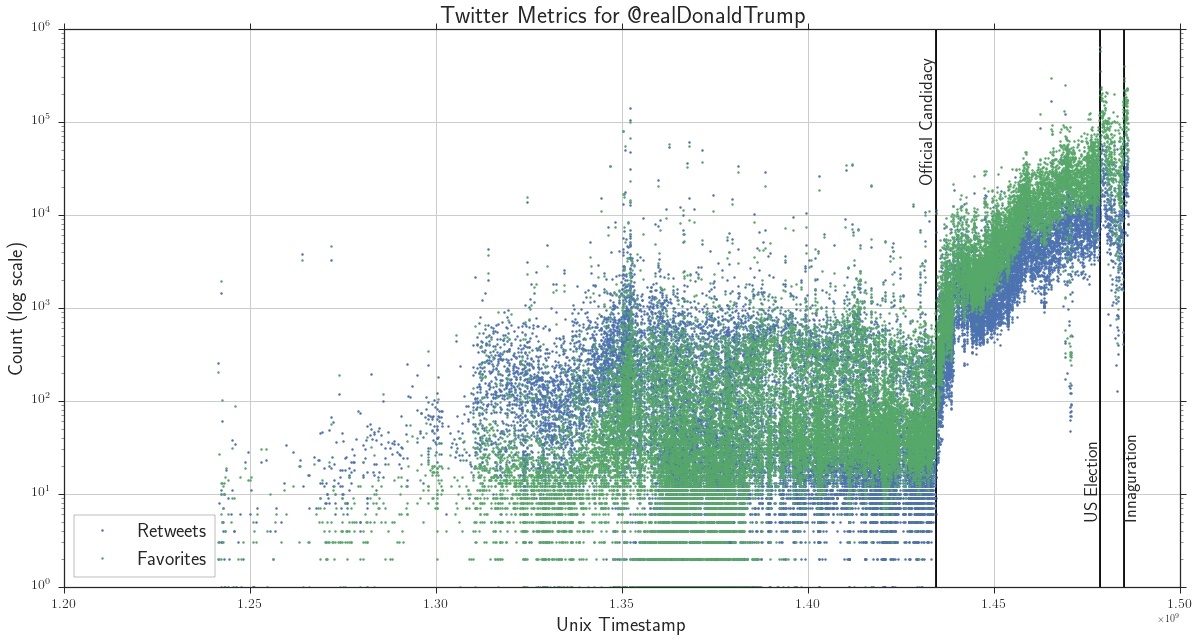

In [38]:
candidacy = 1434448800
election = 1478602800
innaguration = 1484910000

plt.figure(figsize=(20,10))

## Important Dates
plt.gca().annotate('Official Candidacy', xy=(election, 500000), xytext=(candidacy, 100000),
                   fontsize = 18, rotation='vertical', verticalalignment = 'center',
                   horizontalalignment='right')
plt.gca().annotate('US Election', xy=(election, 500000), xytext=(election, 5),
                   fontsize = 18, rotation='vertical', verticalalignment = 'middle',
                   horizontalalignment='right')
plt.gca().annotate('Innaguration', xy=(innaguration, 500000), xytext=(innaguration, 5),
                   fontsize = 18, rotation='vertical', verticalalignment = 'middle',
                   horizontalalignment='left')
plt.plot([candidacy,candidacy],[1,1000000],'-k')
plt.plot([election,election],[1,1000000],'-k')
plt.plot([innaguration,innaguration],[1,1000000],'-k')


# Data
plt.plot(timestamps,tweets['retweet_count'],'.',alpha=1, label="Retweets",markersize=5,markeredgecolor='none')
plt.plot(timestamps,tweets['favorite_count'],'.',alpha=1, label="Favorites",markersize=5,markeredgecolor='none')


plt.plot([candidacy,candidacy],[1,1000000],'-k',alpha=1,linewidth=0.5)
plt.plot([election,election],[1,1000000],'-k',alpha=1,linewidth=0.5)
plt.plot([innaguration,innaguration],[1,1000000],'-k',alpha=1,linewidth=0.5)

plt.gca().set_ylim((1,1000000))
plt.gca().set_yscale('log')
plt.gca().set_xlabel('Unix Timestamp',fontsize = 20)
plt.gca().set_ylabel('Count (log scale)', fontsize = 20)
plt.gca().set_title("Twitter Metrics for @realDonaldTrump", fontsize=24)
plt.gca().grid('on')

for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(14)    
    
plt.legend(loc=3, fontsize = 20, frameon=True)

In [60]:
import numpy as np

timestamps = np.array(timestamps) # Convert to array
tweets_after_candidacy = tweets.iloc[candidacy <= timestamps]

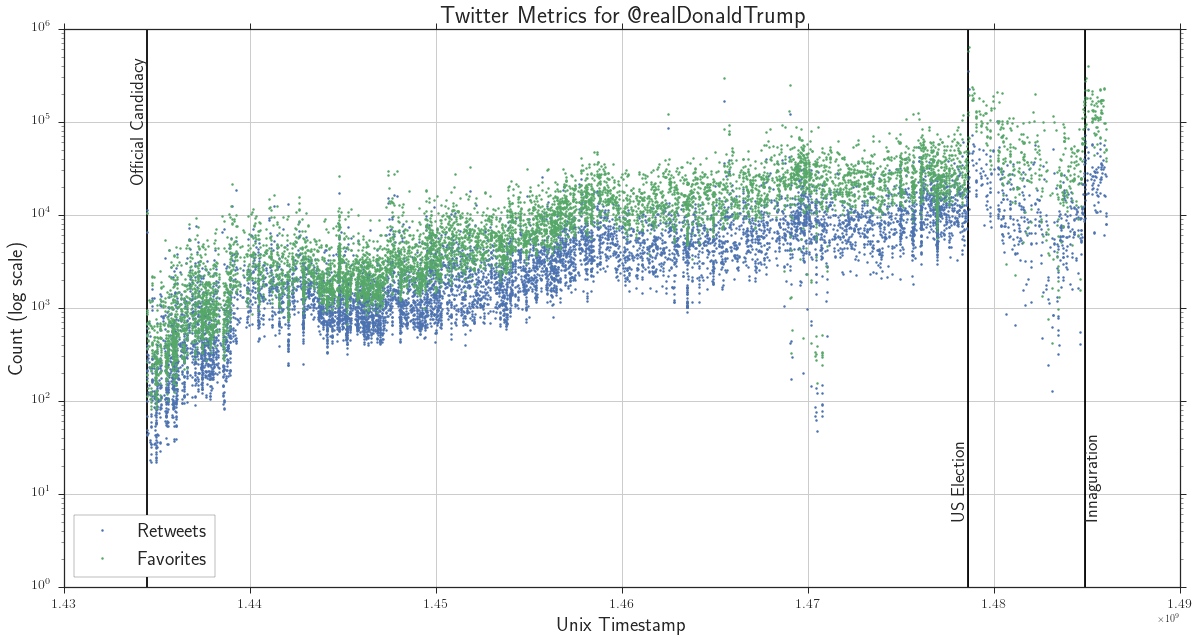

In [66]:
plt.figure(figsize=(20,10))

## Important Dates
plt.gca().annotate('Official Candidacy', xy=(election, 500000), xytext=(candidacy, 100000),
                   fontsize = 18, rotation='vertical', verticalalignment = 'center',
                   horizontalalignment='right')
plt.gca().annotate('US Election', xy=(election, 500000), xytext=(election, 5),
                   fontsize = 18, rotation='vertical', verticalalignment = 'middle',
                   horizontalalignment='right')
plt.gca().annotate('Innaguration', xy=(innaguration, 500000), xytext=(innaguration, 5),
                   fontsize = 18, rotation='vertical', verticalalignment = 'middle',
                   horizontalalignment='left')
plt.plot([candidacy,candidacy],[1,1000000],'-k')
plt.plot([election,election],[1,1000000],'-k')
plt.plot([innaguration,innaguration],[1,1000000],'-k')


# Data
plt.plot(timestamps[candidacy <= timestamps],tweets_after_candidacy['retweet_count'],'.',alpha=1, label="Retweets",markersize=5,markeredgecolor='none')
plt.plot(timestamps[candidacy <= timestamps],tweets_after_candidacy['favorite_count'],'.',alpha=1, label="Favorites",markersize=5,markeredgecolor='none')

plt.plot([election,election],[1,1000000],'-k',alpha=1,linewidth=0.5)
plt.plot([innaguration,innaguration],[1,1000000],'-k',alpha=1,linewidth=0.5)

plt.gca().set_ylim((1,1000000))
plt.gca().set_yscale('log')
plt.gca().set_xlabel('Unix Timestamp',fontsize = 20)
plt.gca().set_ylabel('Count (log scale)', fontsize = 20)
plt.gca().set_title("Twitter Metrics for @realDonaldTrump", fontsize=24)
plt.gca().grid('on')

for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(14)    
    
plt.legend(loc=3, fontsize = 20, frameon=True)

## Finding the #Sad Tweets: Outlier Detection
----
We will now attempt to find the outliers in terms of tweet engagement metrics (retweets/likes). One way to do this: moving average.

In [112]:
import numpy as np

timestamps_after_candidacy = timestamps[candidacy <= timestamps]
oldest_timestamp = np.min(timestamps_after_candidacy)
newest_timestamp = np.max(timestamps_after_candidacy)

retweets = np.array(tweets_after_candidacy['retweet_count'],dtype=float)
favorites = np.array(tweets_after_candidacy['favorite_count'],dtype=float)


## 
def box_average(x, y, box_width, npts = 10):
    """
        box_average(x, y, box_width, npts = 10)
        
        Specify a moving average which is dependent on a
        fixed width prior to the current data sample (rather
        than a simple moving average)
    """
    # 0. Initialize final ouput
    xavg = np.zeros(x.shape)
    yavg = np.zeros(y.shape)
    
    # 1. Sort the data samples by x
    sorted_idx = np.argsort(x)
    x = x[sorted_idx]
    y = y[sorted_idx]
    
    # 2. How many of the samples on the lhs are "dead" ? 
    first_box_rhs = x[0] + box_width
    first_box_idx = x < first_box_rhs
    
    

# n_smoothed_pts = 4000
# smoothed_timestamps = np.linspace(oldest_timestamp,
#                                   newest_timestamp,
#                                   n_smoothed_pts)

# smoothed_retweets = np.interp(smoothed_timestamps,
#                               timestamps_after_candidacy,
#                               retweets)

# smoothed_favorites = np.interp(smoothed_timestamps,
#                                timestamps_after_candidacy,
#                                favorites)

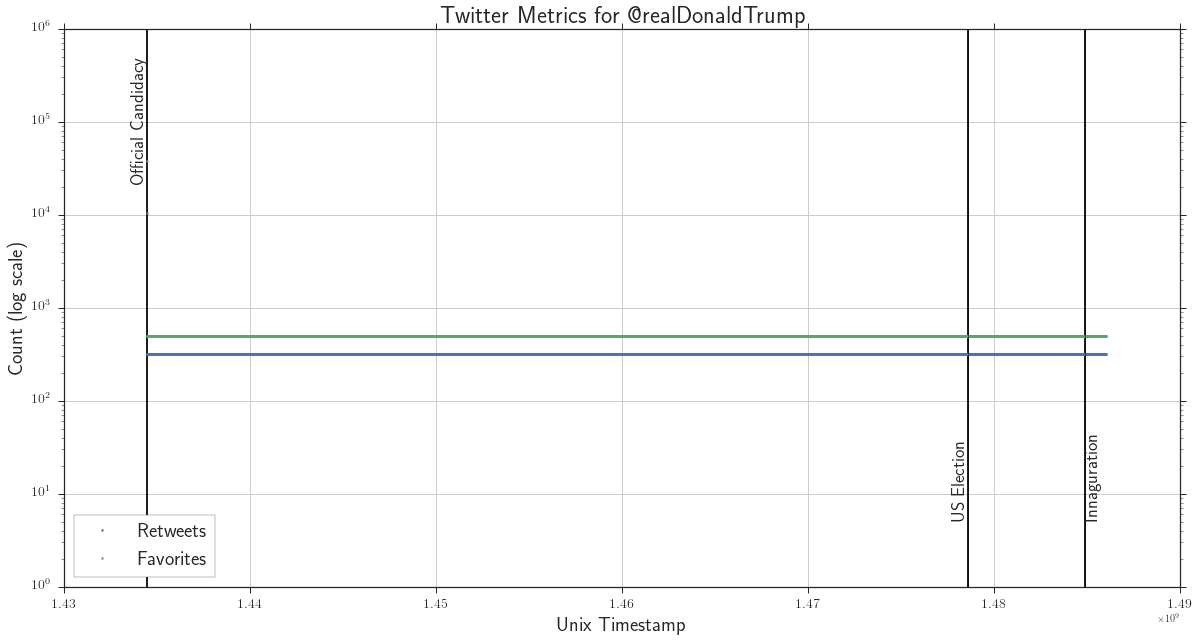

In [113]:
plt.figure(figsize=(20,10))

## Important Dates
plt.gca().annotate('Official Candidacy', xy=(election, 500000), xytext=(candidacy, 100000),
                   fontsize = 18, rotation='vertical', verticalalignment = 'center',
                   horizontalalignment='right')
plt.gca().annotate('US Election', xy=(election, 500000), xytext=(election, 5),
                   fontsize = 18, rotation='vertical', verticalalignment = 'middle',
                   horizontalalignment='right')
plt.gca().annotate('Innaguration', xy=(innaguration, 500000), xytext=(innaguration, 5),
                   fontsize = 18, rotation='vertical', verticalalignment = 'middle',
                   horizontalalignment='left')
plt.plot([candidacy,candidacy],[1,1000000],'-k')
plt.plot([election,election],[1,1000000],'-k')
plt.plot([innaguration,innaguration],[1,1000000],'-k')


# Data
plt.plot(smoothed_timestamps,smoothed_retweets,'.',alpha=1, label="Retweets",markersize=5,markeredgecolor='none')
plt.plot(smoothed_timestamps,smoothed_favorites,'.',alpha=1, label="Favorites",markersize=5,markeredgecolor='none')

plt.plot([election,election],[1,1000000],'-k',alpha=1,linewidth=0.5)
plt.plot([innaguration,innaguration],[1,1000000],'-k',alpha=1,linewidth=0.5)

plt.gca().set_ylim((1,1000000))
plt.gca().set_yscale('log')
plt.gca().set_xlabel('Unix Timestamp',fontsize = 20)
plt.gca().set_ylabel('Count (log scale)', fontsize = 20)
plt.gca().set_title("Twitter Metrics for @realDonaldTrump", fontsize=24)
plt.gca().grid('on')

for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(14)    
    
plt.legend(loc=3, fontsize = 20, frameon=True)

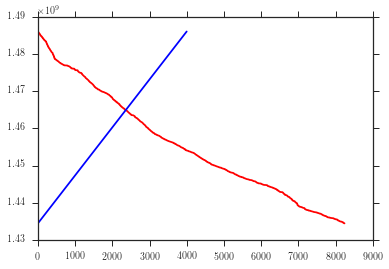

In [119]:
plt.plot(timestamps_after_candidacy,'-r')
plt.plot(smoothed_timestamps,'-b')

In [118]:
type(timestamps_after_candidacy)

numpy.ndarray

In [121]:
smoothed_retweets
retweets

array([ 10418.,   9671.,   8018., ...,     44.,     49.,    315.])

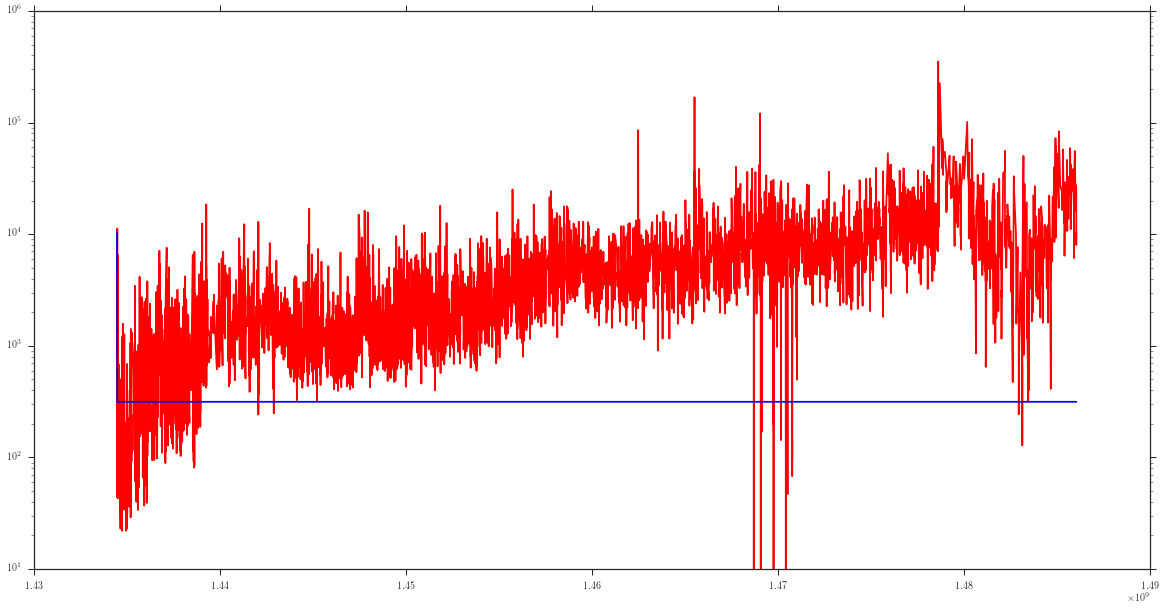

In [128]:
plt.figure(figsize=(20,10))
plt.plot(timestamps_after_candidacy,retweets,'-r')
plt.plot(smoothed_timestamps,smoothed_retweets,'-b')
plt.gca().set_yscale('log')

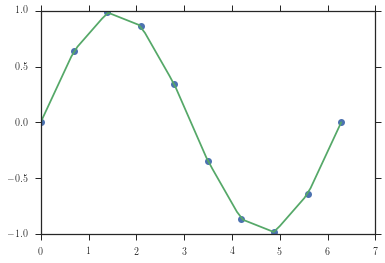

In [125]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)
plt.plot(x, y, 'o')
plt.plot(xvals, yinterp, '-x')

In [132]:
np.argsort([5,4,3,2,1])
([5,4,3,2,1])[np.argsort([5,4,3,2,1])]

TypeError: only integer scalar arrays can be converted to a scalar index

In [137]:
np.zeros(retweets.shape)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])